# 붓꽃의 품종 종류
3종류의 붓꽃의 꽃잎의 길이와 너비 꽃받침의 길이와 너비 데이터를 가지고 있다.

학습을 위해서 많이 사용하는 데이터 중 가장 단순한 구조로 되어있는 데이터지만 다양한 모델들을 이해하고 테스트하기 위해 매우 계산적으로
잘 만들어진 데이터 중 하나이다.

In [1]:
import pandas as pd
import seaborn as sns

### 데이터 로딩

In [2]:
iris_df = pd.read_csv('iris.csv')
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- sepal length : 꽃받침의 길이
- sepal width : 꽃받침의 넓이
- petal length : 꽃잎의 길이
- petal width : 꽃잎의 넓이

### 데이터 분석

In [3]:
# 꽃이 몇개인지 갯수 파악
iris_df['target'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: target, dtype: int64

In [4]:
# 데이터 프레임의 행의 수와 열의 수 파악한다.
# 전체 데이터의 행의 수
iris_df.shape

(150, 5)

In [5]:
# 데이터 프레임에 대한 정보를 한눈에 파악
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


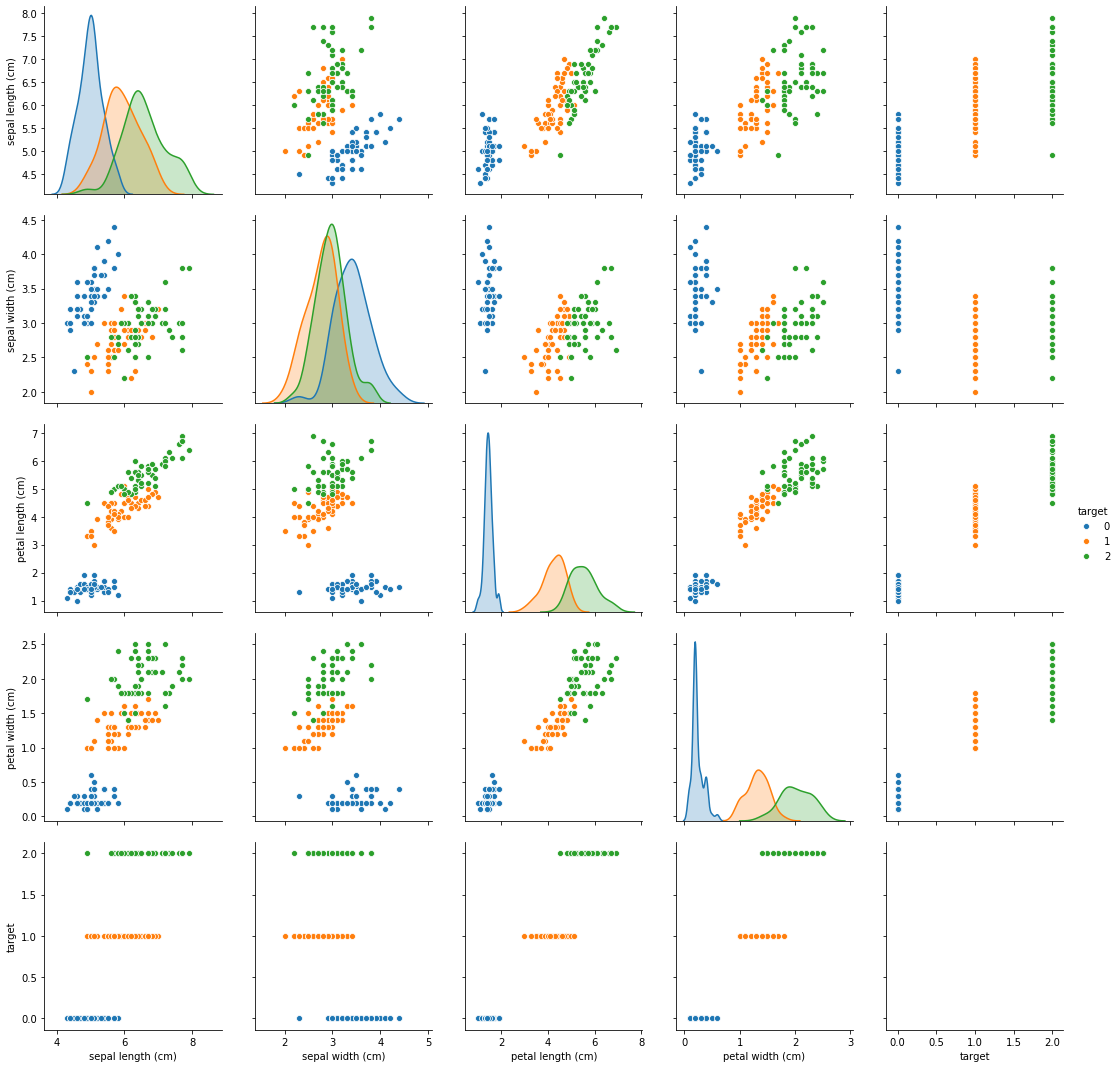

In [15]:
# 시각화
sns.pairplot(iris_df, hue='target', height=3)

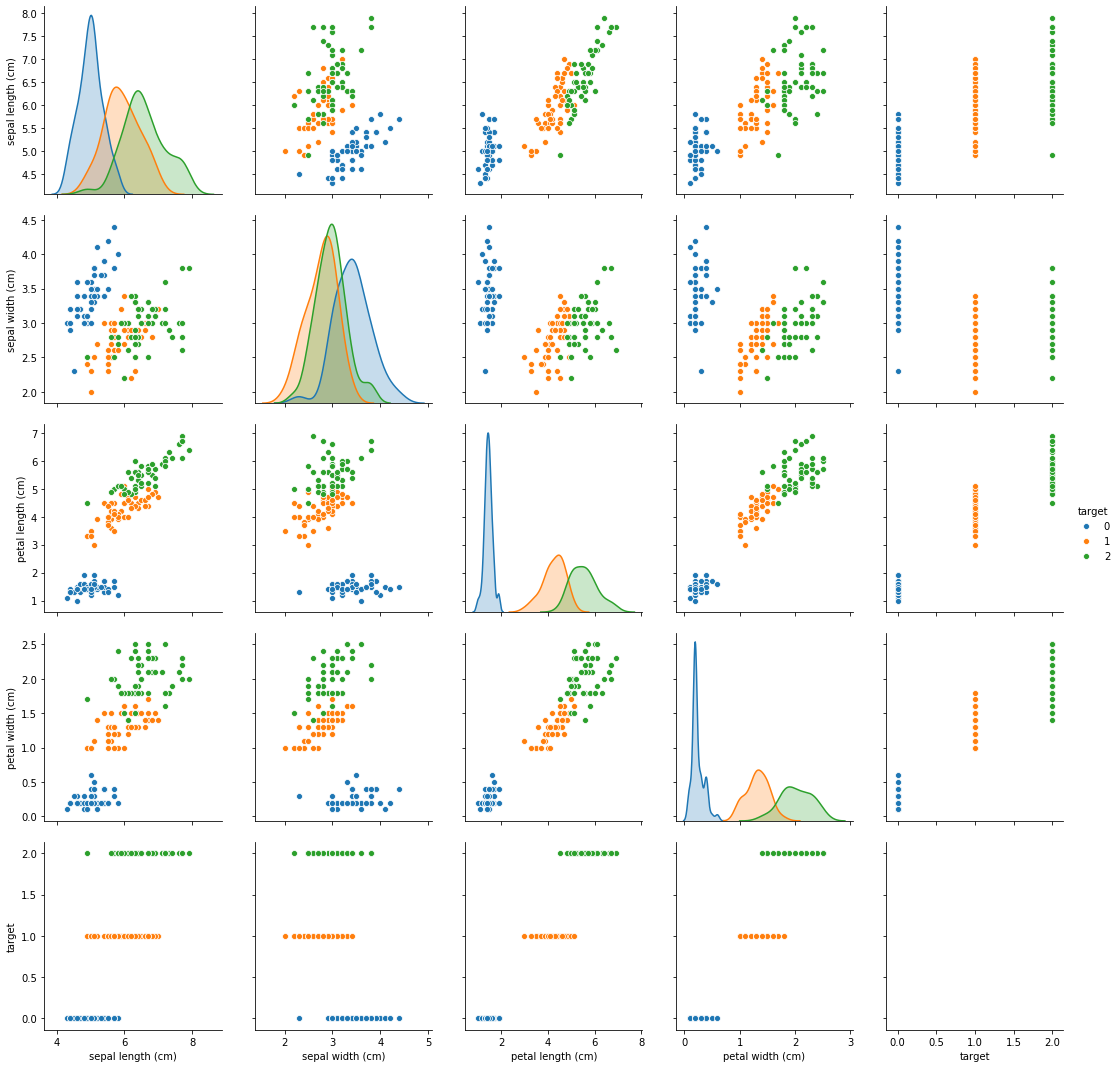

In [14]:
# 시각화
sns.pairplot(iris_df, hue='target', height=3)

### 데이터 전처리

In [7]:
# 꽃 종류를 나타내는 단어를 숫자로 변경한다.
map1 = {
    'setosa' : 0,
    'versicolor' : 1,
    'virginica' : 2
}

iris_df['target'] = iris_df['target'].map(map1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 학습 데이터 준비

In [16]:
from sklearn.model_selection import train_test_split

# 입력데이터와 결과데이터로 나눈다.
X = iris_df.iloc[:, :4]
Y = iris_df['target']

# 학습데이터와 결과 데이터로 나눈다. (8 : 2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# 학습데이터와 결과 데이터로 나눈다. (7 : 3)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

### 학습

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 검증

In [18]:
print(model.score(X_test, Y_test))

0.9473684210526315


Muller 가 2005년에 발표한 논문의 AUC 레벨 등급

- 0.9 ~ 1.0 : Excellent
- 0.9 ~ 0.9 : Good
- 0.7 ~ 0.8 : Fair
- 0.6 ~ 0.7 : Poor
- 0.6 미만 : Fail

### 사용하기

In [19]:
import numpy as np
X_new = np.array([
    [5, 3.4, 1.5, 0.2],
    [6.7, 3, 5, 1.7],
    [6.8, 3.2, 5.9, 2.3]
])

# 예측 결과를 가져온다.
y_pred = model.predict(X_new)
y_pred

array([0, 1, 2], dtype=int64)